In [10]:
import numpy as np
import pandas as pd
import random
import os
np.random.seed(1337)
random.seed(1337)
from matplotlib import pyplot as plt
import matplotlib
# import tensorflow as tf
# from tensorflow import keras
# from keras.regularizers import l2
# from sklearn.model_selection import KFold
# from matplotlib import pyplot
import ast
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
import skimage.io as sk
import pickle
import cv2
from stegano import lsb

In [3]:
BASE_PATH = "/kaggle/input/alaska2-image-steganalysis"

In [4]:
train_x = pd.Series(os.listdir(BASE_PATH + '/Cover')).sort_values(ascending=True).reset_index(drop=True)
test_x = pd.Series(os.listdir(BASE_PATH + '/Test')).sort_values(ascending=True).reset_index(drop=True)
train_cover_x=cover_images_path = pd.Series(BASE_PATH + '/Cover/' + train_x).sort_values(ascending=True)
train_uerd_x= pd.Series(BASE_PATH + '/UERD/'+train_x).sort_values(ascending=True)
test_images = pd.Series(BASE_PATH + '/Test/'+test_x).sort_values(ascending=True)

This is the pixel deviation for the same image in cover that is without stegano to a image in uerd with hidden message.

Text(0, 0.5, 'UERD')

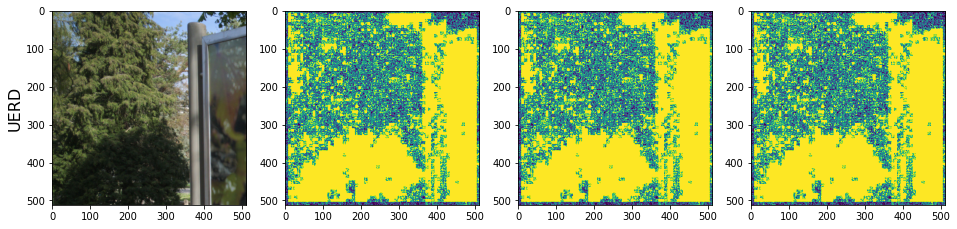

In [5]:
img_cover = sk.imread(train_cover_x[0])
img_uerd = sk.imread(train_uerd_x[0])
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 12))
ax[0].imshow(img_uerd)
ax[1].imshow((img_cover == img_uerd).astype(int)[:,:,0])
ax[2].imshow((img_cover == img_uerd).astype(int)[:,:,1])
ax[3].imshow((img_cover == img_uerd).astype(int)[:,:,2])
ax[0].set_ylabel('UERD', rotation=90, fontsize=16)

As data is large first we will do pre processing to decrease size

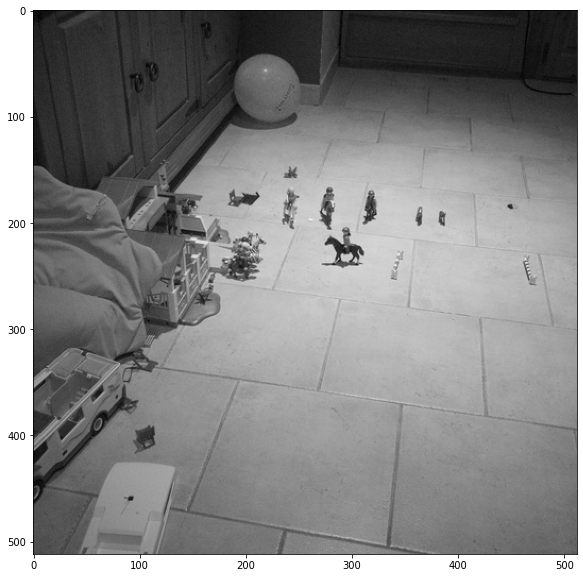

In [6]:
img_array_gray = cv2.cvtColor(sk.imread(train_cover_x[1]), cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 10))
plt.imshow(img_array_gray, cmap='gray')

After gray scalling we reduce pixels. 

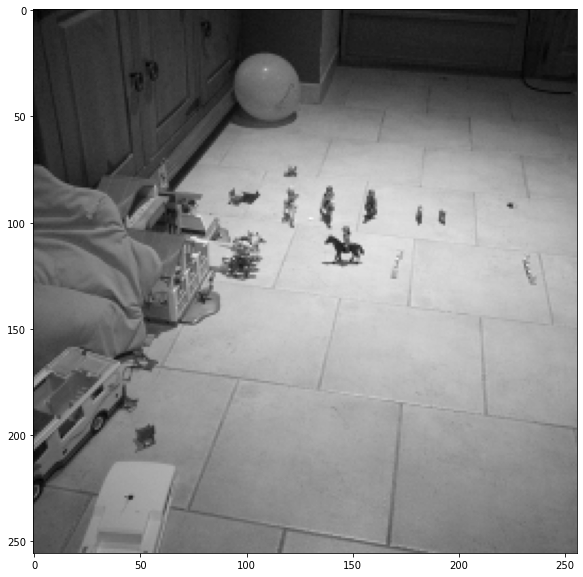

In [7]:
size = 256
img_array_gray_resize = cv2.resize(img_array_gray, (size, size))
plt.figure(figsize=(10, 10))
plt.imshow(img_array_gray_resize, cmap='gray')

Lets try to hide message inside a plain image from cover ourself and try to see difference

In [9]:
!pip install stegano

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.4/301.4 kB 533.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 5.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.1.1
    Uninstalling Pillow-9.1.1:
      Successfully uninstalled Pillow-9.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
allennlp 2.10.0 requires protobuf==3.20.0, but you have protobuf 3.19.4 which is incompatible.


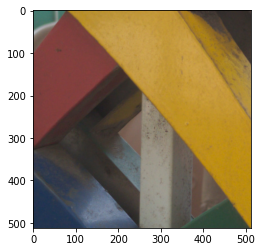

In [14]:
normal_image = sk.imread(train_cover_x[120])
plt.imshow(normal_image)

In [15]:
secret = lsb.hide(train_cover_x[120], "I am the secret message encryted in the image and you cant see me and I am verrryyyyy long")
secret.save("encoded.png")

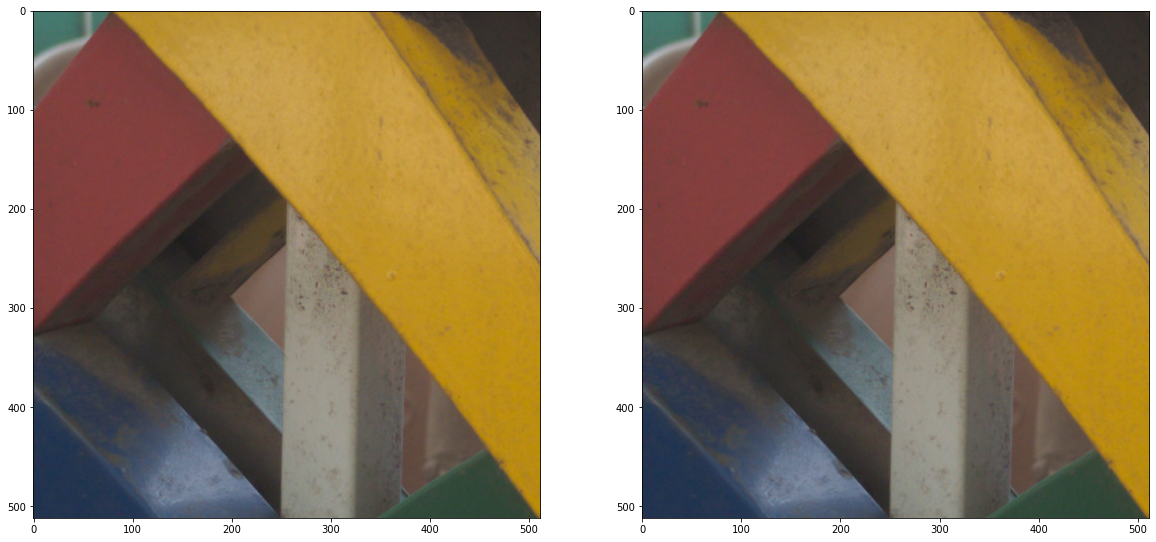

In [16]:
sec_image=sk.imread('/kaggle/working/encoded.png')
fig,ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(normal_image)
ax[1].imshow(sec_image)

As can be seen there is no noticeable difference.

Now extracting data

In [8]:
CATEGORIES = ['Cover', 'UERD']

In [70]:
size = 100

X = []
y = []

for x in range(50000):
    try:
        img_array_gray = cv2.cvtColor(sk.imread(train_cover_x[x]), cv2.COLOR_BGR2GRAY)
        img_array_gray_resize = cv2.resize(img_array_gray, (size, size))
        X.append(img_array_gray_resize)
        y.append(CATEGORIES[0])
        if (x%10000==0):print(x)
    except Exception as e:
        pass
for x in range(50000):
    try:
        img_array_gray = cv2.cvtColor(sk.imread(train_uerd_x[x]), cv2.COLOR_BGR2GRAY)
        img_array_gray_resize = cv2.resize(img_array_gray, (size, size))
        X.append(img_array_gray_resize)
        y.append(CATEGORIES[1])
        if (x%10000==0):print(x)
    except Exception as e:
        pass

0
10000
20000
30000
40000
0
10000
20000
30000
40000


In [71]:
X = np.array(X).reshape(-1, size, size, 1)
with open("X.pickle", 'wb') as pickle_out:
    pickle.dump(X, pickle_out)

with open("y.pickle", 'wb') as pickle_out:
    pickle.dump(y, pickle_out)